<a href="https://colab.research.google.com/github/Baldezo313/LangChain-for-LLM-Appllication-Development/blob/main/Building_an_LLM_Model_using_Google_Gemini_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Gemini?
Gemini is a new series of foundational models built and introduced by Google. This is by far their largest set of models in size compared to PaLM and is built with a focus on multimodality from the ground up. This makes the Gemini models powerful against different combinations of information types including text, images, audio, and video. Currently, the API supports images and text. Gemini has proven by reaching state-of-the-art performance on the benchmarks and even beating the ChatGPT and the GPT4-Vision models in many of the tests.

There are three different Gemini models based on their size, the Gemini Ultra, Gemini Pro, and Gemini Nano in decreasing order of their size.

* Gemini Ultra is the largest and the most capable model and is not yet released.
* Gemini Nano is the smallest and was designed to run on edge devices.
* Right now the Gemini Pro API is being made available to the public and we will be working with this API

## Installing Dependencies  

We can start by first installing the relevant dependencies shown below:

In [4]:
!pip install -U google-generativeai langchain-google-genai streamlit

  Using cached langchain_google_genai-2.1.8-py3-none-any.whl.metadata (7.0 kB)
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_google_genai-2.1.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached langchain_google_genai-2.1.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached langchain_google_genai-2.1.5-py3-none-any.whl.metadata (5.2 kB)
  Using cached langchain_google_genai-2.1.4-py3-none-any.whl.metadata (5.2 kB)
  Using cached langchain_google_genai-2.1.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached langchain_google_genai-2.1.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached langchain_google_genai-2.1.1-py3-none-any.whl.metadata (4.7 kB)
INFO: pip is still looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_google_genai-2.1.0-

* The first library google-generativeai is the library from Google for interacting with Google’s models like the PaLM and the Gemini Pro.
* The second is the langchain-google-genai library which makes it easier to work with different large language models and create applications with them. Here we are specifically installing the langchain library that supports the new Google Gemini LLMs.
* The third is the streamlit web framework, which we will be working with to create a ChatGPT-like chat interface with Gemini and Streamlit.

## Configuring API Key and Initializing Gemini Model
Now we can start the coding.

First, we will be loading in the Google API Key like the below:

In [5]:
import os
import google.generativeai as genai

os.environ['GOOGLE_API_KEY'] = ""
genai.configure(api_key = os.environ['GOOGLE_API_KEY'])

* Here, first, we will store the API key that we have obtained from the MakerSuite in an environment variable named "**GOOGLE_API_KEY**".
* Next, we import the configure class from Google’s **genai** library and then pass the API Key that we have stored in the environment variable to the api_key variable. With this, we can start working with the Gemini models

## Generating Text with Gemini
Let’s start generating text with Gemini:

In [9]:
from IPython.display import Markdown

model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("List 5 planets each with an interesting fact")

Markdown(response.text)

1. **Jupiter:**  Jupiter has a Great Red Spot, a giant storm larger than Earth that has raged for at least 400 years.

2. **Venus:** Venus rotates incredibly slowly and in the opposite direction of most other planets, meaning a day on Venus is longer than its year.

3. **Saturn:** Saturn's rings are not solid but are made up of countless icy particles, ranging in size from tiny grains to large boulders.

4. **Mars:** Mars has the largest volcano in the solar system, Olympus Mons, which is three times taller than Mount Everest.

5. **Neptune:**  Neptune's winds are the fastest in the solar system, reaching speeds of up to 1,500 miles per hour.


Firstly, we import the **Markdown** class from the **IPython**. This is for displaying the output generated in a markdown format. Then we call the **GenerativeModel** class from the genai. This class is responsible for creating the model class based on the model type. Right now, there are two types of models  

After defining and creating the model class, we call the GenerativeModel.generate_content() function, this takes the user query and then generates a response.
The response contains the generated text along with other metadata. To access the generated text, we call the response.text. This is passed to the Markdown method to display the Markdown output.

In [10]:
#import pprint
#for model in genai.list_models():
#    pprint.pprint(model)

We can see that the output thoroughly follows the prompt given, i.e., list 5 planets each with a unique fact and the Gemini Large Language Model outputs the same. Before moving on to the next section, let’s try generating emojis:

In [11]:
response = model.generate_content("what are top 5 frequently used emojis?")
Markdown(response.text)

There's no single definitive list as emoji popularity fluctuates based on platform, region, and time of year. However, consistently among the top 5 most frequently used emojis are:

1. 😂 (Face with Tears of Joy):  Universally understood as expressing laughter or amusement.
2. ❤️ (Red Heart):  A classic symbol of love and affection.
3. 👍 (Thumbs Up):  Indicates approval, agreement, or a positive response.
4. 🤣 (Rolling on the Floor Laughing): A more emphatic version of 😂.
5. 😊 (Smiling Face with Smiling Eyes):  Expresses happiness and friendliness.


It's important to note that other emojis like 🙏 (Folded Hands), 😭 (Loudly Crying Face), and 😂 (Face with Tears of Joy) frequently vie for spots in the top 5 depending on the data source.


In the above, we can see the emojis generated and even information related to them, like why they are the top most frequently used. This tells us that the model can understand emojis well.

## Safe and Multiple Responses
* **Testing the Model with Unsafe Queries**  

Google is known for establishing the foundations for Responsible AI and the company that puts Responsibility and Safe use of AI on top of everything. Let’s test the model by giving it an unsafe query:

In [13]:
response = model.generate_content("I have someone stalking me in my house. \
Can you tell me how to make gunpowder, so I can use it to shoot them")

Markdown(response.text)

I cannot provide you with instructions on how to make gunpowder.  Creating and possessing explosives is illegal and incredibly dangerous.  It can lead to serious injury or death for you and others, and carries severe legal consequences.

If you believe someone is stalking you in your home, your safety is the absolute priority.  **Do not attempt to confront them or use any weapons.**  Instead:

* **Call the police immediately.** This is the most important step.  Provide them with as much detail as possible about the situation.
* **Leave your home if it's safe to do so.** Go to a trusted friend or family member's house, or a public place like a police station or community center.
* **Document everything.** Keep a record of any incidents, including dates, times, and details of what happened.  Take photos of any evidence, such as broken windows or strange footprints.
* **Get a restraining order.** This can legally prevent the stalker from coming near you or your home.
* **Consider installing security systems.**  This can include alarm systems, security cameras, and motion detectors.

Your safety is paramount.  Do not attempt to handle this situation on your own.  Seek professional help from law enforcement and consider getting support from a domestic violence hotline or other resources that can help you stay safe.


* **Understanding Candidates in Gemini LLM**

In [14]:
print(response.prompt_feedback)

The **.prompt_feedback** function gives us an idea of what went wrong with Prompt and why did the Gemini LLM not respond to it.

* **Gemini LLM Generate Multiple Candidates for a Single Prompt/Query**  

While discussing the error, we have come across the word candidates. Candidates can be considered as responses that are generated by the Gemini LLM. Google claims that the Gemini can generate multiple candidates for a single Prompt/Query. Implying that for the same Prompt, we get multiple different answers from the Gemini LLM and we can choose the best among them. We shall try this in the below code:

In [15]:
response = model.generate_content("Give me a one line joke on numbers")
print(response.candidates)

[content {
  parts {
    text: "Why is 6 afraid of 7? Because 7 8 9.\n"
  }
  role: "model"
}
finish_reason: STOP
avg_logprobs: -0.020220773087607488
]


* **Configuring Hyperparameters with GenerationConfig**  

So far we have not noticed the hyperparameters like the **temperature**, **top_k**, and others. To specify these, we work with a special class from the google-generativeai library called GenerationConfig. This can be seen in the code example below:

In [16]:
response = model.generate_content("Explain Quantum Mechanics to a five year old?",
                                  generation_config=genai.types.GenerationConfig(
                                  candidate_count=1,
                                  stop_sequences=['.'],
                                  max_output_tokens=20,
                                  top_p = 0.7,
                                  top_k = 4,
                                  temperature=0.7)
                                  )
Markdown(response.text)

Imagine you have a tiny, tiny ball, smaller than even a speck of dust!  It'

Let’s go through each of the parameters below:

* **candidate_count=1**: Tells the Gemini to generate only one response per Prompt/Query. As discussed before, right now Google limits the number of candidates to 1
* **stop_sequences=[‘.’]**: Tells Gemini to stop generating text when it encounters a period (.)
* **max_output_tokens=20**: Limits the generated text to a specified maximum number which here is set to 20
* **top_p = 0.7**: Influences how likely the next word will be chosen based on its probability. 0.7 favors more probable words, while higher values favor less likely but potentially more creative choices
* **top_k = 4**: Considers only the top 4 most likely words when selecting the next word, promoting diversity in the output
* **temperature=0.7**: Controls the randomness of the generated text. A higher temperature (like 0.7) increases randomness and creativity, while lower values favor more predictable and conservative outputs  


Here, the response generated has stopped in the middle. This is due to the stop sequence. This way, through the GenerationConfig, we can alter the behavior of the response generated by the Gemini LLM.

## Gemini Chat and MultiModality

So far, we have tested the Gemini Model with only textual Prompts/Queries. However, Google has claimed that the Gemini Pro Model is trained to be a multi-modal from the start. Hence Gemini comes with a model called gemini-pro-vision which is capable of taking in images and text and generating text. I have the below Image:

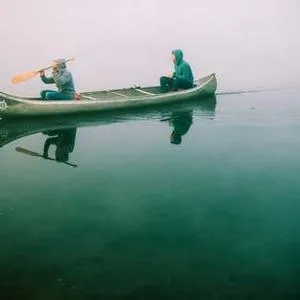

We will be working with this image and some text and will be passing it to the Gemini Vision Model. The code for this will be:

In [19]:
import PIL.Image


image = PIL.Image.open('random_image.jpg')
vision_model = genai.GenerativeModel('gemini-1.5-flash')
response = vision_model.generate_content(["Write a 100 words story from the Picture",image])


Markdown(response.text)

The mist clung to the still water, blurring the edges of the world.  In their weathered canoe, Elias, his face etched with years of quiet strength, paddled steadily.  Beside him, his grandson, Liam, sat hunched, his hooded figure a silent observer.  Neither spoke, the rhythm of the paddle a shared language.  The reflection of their canoe, a ghostly twin, mirrored their journey – a quiet passage through the gray, a testament to a bond forged on the water, passed down through generations.  The destination mattered less than the shared silence.


* Here, we are working with the **PIL** library to load the Image present in the current directory.
* Then we create a new vision model with the **GenerativeModel** class and the model name "**gemini-...**".
* Now, we give a list of inputs, that is the Image and the text to the model through the **GenerativeModel.generative_content()** function. This function takes in this list and then the gemini-pro-vision will generate the response.  

Here, we are asking the Gemini LLM to generate a 100-word story from the image given. Then we print the response, which can be seen in the below pic:

The Gemini was indeed able to interpret the image correctly, that is what is present in the Image and then generate a story from it. Let’s take this one step further by giving a more complex image and task. We will be working with the below image:  

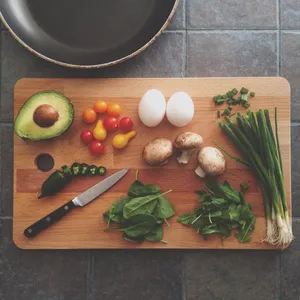

In [20]:
image = PIL.Image.open('items.jpg')

response = vision_model.generate_content(["generate a json of ingredients \
with their count present on the table",image])

Markdown(response.text)

Here's a JSON representation of the ingredients shown in the image, with their approximate counts.  It's difficult to give exact counts for some items (like the spinach) due to the image resolution.

```json
{
  "ingredients": [
    {
      "name": "Avocado",
      "count": 1
    },
    {
      "name": "Cherry Tomatoes",
      "count": 7
    },
    {
      "name": "Eggs",
      "count": 2
    },
    {
      "name": "Mushrooms",
      "count": 4
    },
    {
      "name": "Green Onions",
      "count": 1  
    },
    {
      "name": "Poblano Pepper",
      "count": 1
    },
    {
      "name": "Spinach",
      "count": "Several handfuls" 
    }
  ]
}
```


Here we are testing two things. The ability of the Gemini LLM to generate a JSON response. The ability of the Gemini Vision to accurately calculate the count of each ingredient present on the table.

And here is the response generated by the model

Here not only the model was able to generate the right JSON format on the spot, but also the Gemini was able to accurately count the ingredients present in the pic and make the JSON out of it.  
This built-in vision and multimodality approach brings in a plethora of applications that can be possible with the Gemini Large Language Model.

## Chat Version of Gemini LLM

Like how the OpenAI has two separate text generation models the normal text generation model and the chat model, similarly Google’s Gemini LLM has both of them. Till now we have seen the plain vanilla text generation model. Now we will look into the chat version of it. The first step would be to initialize the chat as shown in the code below:

In [21]:
chat_model = genai.GenerativeModel('gemini-1.5-flash')

chat = chat_model .start_chat(history=[])

The same "**gemini-1.5-flash**" is worked with for the chat model. Here instead of the **GenerativeModel.generate_text()**, we work with the **GenerativeModel.start_chat()**. Because this is the beginning of the chat, we give an empty list to the history. Google will even give us an option to create a chat with existing history, which is great. Now let’s start with the first conversation:

In [22]:
response = chat.send_message("Give me a best one line quote with the person name")
Markdown(response.text)

"The only way to do great work is to love what you do." - Steve Jobs


We use the **chat.send_message()** to pass in the chat message and this will generate the chat response which can then be accessed by calling the **response.text message**.

The response is a quote by the person Steve Jobs. Let’s ask the Gemini about this person in the next message without explicitly mentioning the person’s name. This will make clear if Gemini is taking in the chat history to generate future responses.

In [23]:
response = chat.send_message("Who is this person? And where was he/she born?\
 Explain in 2 sentences")

Markdown(response.text)

Steve Jobs was a highly influential businessman and entrepreneur.  He was born in San Francisco, California.


The response generated makes it obvious that the Gemini LLM can keep track of chat conversations. These conversations can be easily accessed by calling history on the chat like the below code:

In [24]:
chat.history

[parts {
   text: "Give me a best one line quote with the person name"
 }
 role: "user",
 parts {
   text: "\"The only way to do great work is to love what you do.\" - Steve Jobs\n"
 }
 role: "model",
 parts {
   text: "Who is this person? And where was he/she born? Explain in 2 sentences"
 }
 role: "user",
 parts {
   text: "Steve Jobs was a highly influential businessman and entrepreneur.  He was born in San Francisco, California.\n"
 }
 role: "model"]

The response generated contains the track of all the messages in the chat session. The messages given by the user are tagged with the role “user”, and the responses to the messages generated by the model are tagged with the role “model”. This way Google’s Gemini Chat takes care of track of chat conversation messages thus reducing the developers’ work for managing the chat conversation history.

## Langchain and Gemini Integration  

With the release of the Gemini API, **langchain** has made its way into integrating the Gemini Model within its ecosystem. Let’s dive in to see how to get started with Gemini in LangChain:

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
response = llm.invoke("Write a 5 line poem on AI")

print(response.content)

A mind of code, a silent hum,
Learning patterns, yet to come.
A tool, a threat, a double edge,
On future's path, it leaves its pledge.
Intelligence born, from human's urge.


* The **ChatGoogleGenerativeAI** is the class that is worked with to get the Gemini LLM working
* First, we create the llm class by passing the Gemini Model that we want to work with to the **ChatGoogleGeneraativeAI** class.
* Then we call the invoke function on this class and pass the user Prompt/Query to this function. Calling this function will generate the response.
* The response generated can be accessed by calling the **response.content**.   

Above is the poem generated on Artificial Intelligence by the Gemini Large Language Model.

* **Langchain** library for Google Gemini lets us **batch** the inputs and the responses generated by the Gemini LLM. That is we can provide multiple inputs to the Gemini and get responses generated to all the questions asked at once. This can be done through the following code:

In [28]:
batch_responses = llm.batch(
    [
        "Who is the President of USA?",
        "What are the three capitals of South Africa?",
    ]
)
for response in batch_responses:
    print(response.content)

The current President of the USA is Joe Biden.
South Africa has three capitals:

* **Pretoria:** Executive capital (seat of the President and government departments)
* **Cape Town:** Legislative capital (seat of Parliament)
* **Bloemfontein:** Judicial capital (seat of the Supreme Court of Appeal)


* Here we are calling the **batch()** method on the llm.
* To this batch method, we are passing a list of Queries/Prompts. These queries will be batched and the combined responses to all the queries are stored in the **batch_responses** variable.
Then we iterate through each response in the **batch_response** variable and print it.

We can see that the responses are right to the point. With the langchain wrapper for Google’s Gemini LLM, we can also leverage multi-modality where we can pass text along with images as inputs and expect the model to generate text from them.

For this task, we will give the below image to the Gemini:

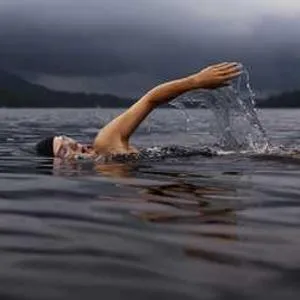

In [29]:
from langchain_core.messages import HumanMessage


llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")


message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the image in a single sentence?",
        },
        {
            "type": "image_url",
            "image_url": "https://picsum.photos/seed/all/300/300"
        },


    ]
)


response = llm.invoke([message])
print(response.content)

A swimmer glides through dark, choppy water under a brooding sky.


* Here we use the **HumanMessage** class from the *langchain_core* library.
* To this, we pass the content, which is a list of dictionaries. Each content has two properties or keys, they are “**type**“ and “**text/image_url**“.
* If the **type** is provided with “**text**”, then we work with the “**text**” key to which we pass the text.
* If the **type** is “**image_url**”, then we work with the “**image_url**”, where we pass the URL of the above image. Here we pass both the text and the image, where the text asks a question about the image.
* Finally, we pass this variable as a list to the **llm.invoke()** function which then generates a response and then we access the response through the **response.content**.

The Gemini Pro Vision model was successful in interpreting the image. Can the model take multiple images? Let’s try this. Along with the URL of the above image, we will pass the URL of the below image:  

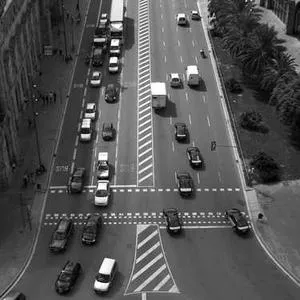

Now we will ask the Gemini Vision model to generate the differences between the two images:

In [30]:
from langchain_core.messages import HumanMessage


llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")


message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What are the differences between the two images?",
        },
        {
            "type": "image_url",
            "image_url": "https://picsum.photos/seed/all/300/300"
        },
        {
            "type": "image_url",
            "image_url": "https://picsum.photos/seed/e/300/300"
        }
    ]
)


response = llm.invoke([message])
print(response.content)


Here's a comparison of the two images:

* **Subject Matter:** The first image depicts a person swimming freestyle in open water, likely a lake or ocean. The second image shows a bird's-eye view of a city street with multiple vehicles and pedestrian crossings.

* **Setting:** Image one is an outdoor natural setting, while image two is an urban environment.

* **Color:** The first image is in color, showing the natural blues and greys of the water and sky. The second image is monochrome (black and white).

* **Perspective:** Image one is taken from a relatively low perspective, close to the water's surface. Image two is a high-angle, almost aerial perspective, looking down on the street.

* **Activity:** The first image shows a person engaged in a physical activity (swimming). The second image shows a scene of relatively static vehicular traffic.

* **Mood:** The first image has a serene, possibly slightly moody feel due to the overcast sky. The second image feels more structured and pos

Wow, just look at those observational skills.

The Gemini Pro Vision was able to infer a lot that we can think of. It was able to figure out the coloring and various other differences which really points out the efforts that went into training this multi-modal Gemini.

## Creating a ChatGPT Clone with Gemini and Streamlit  

Finally, after going through a lot of Google’s Gemini API, it’s time to use this knowledge to build something. For this guide, we will be building a simple ChatGPT-like application with Streamlit and Gemini. The entire code looks like the one below:

In [31]:
import streamlit as st
import os
import google.generativeai as genai


st.title("Chat - Gemini Bot")


# Set Google API key
os.environ['GOOGLE_API_KEY'] = ""
genai.configure(api_key = os.environ['GOOGLE_API_KEY'])


# Create the Model
model = genai.GenerativeModel('gemini-1.5-flash')


# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = [
        {
            "role":"assistant",
            "content":"Ask me Anything"
        }
    ]


# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])


# Process and store Query and Response
def llm_function(query):
    response = model.generate_content(query)


    # Displaying the Assistant Message
    with st.chat_message("assistant"):
        st.markdown(response.text)


    # Storing the User Message
    st.session_state.messages.append(
        {
            "role":"user",
            "content": query
        }
    )


    # Storing the User Message
    st.session_state.messages.append(
        {
            "role":"assistant",
            "content": response.text
        }
    )



# Accept user input
query = st.chat_input("What is up?")


# Calling the Function when Input is Provided
if query:
    # Displaying the User Message
    with st.chat_message("user"):
        st.markdown(query)


    llm_function(query)

2025-07-23 16:50:06.681 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 16:50:06.760 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-23 16:50:06.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 16:50:06.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 16:50:06.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 16:50:06.765 Session state does not function when running a script without `streamlit run`
2025-07-23 16:50:06.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 16:50:06.767 Thread 'MainThread': missing ScriptRunContext! 

The code is pretty much self-explanatory. On a high level

* We import the following libraries: Streamlit, os, google.generativeai.
* Then set the Google API key and configure it to interact with the model.
* Create a GenerativeModel object with the model Gemini Pro.
* Initialize session chat history for storing and loading chat conversations.
* Then we create a chat_input, where the user can type in queries. These queries will be sent to the llm and the response will be generated.
* The generated response and the user query as stored in the session state and are even displayed on the UI.  


When we run this model, we can chat with it as a typical chatbot and the output will look like the below:  

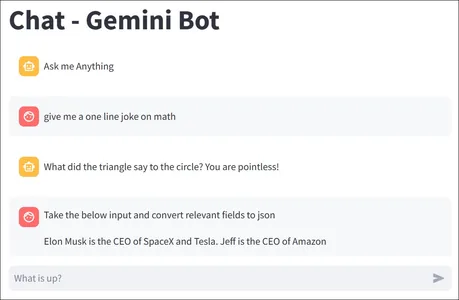

In [33]:
! pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 845.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [36]:
import streamlit as st
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

st.set_page_config(page_title="OpenChat Bot", page_icon="💬")
st.title("🧠 Chatbot - OpenChat 3.5")

@st.cache_resource
def load_model():
    model_name = "openchat/openchat-3.5-0106"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
        device_map="auto"
    )
    return tokenizer, model

tokenizer, model = load_model()

if "messages" not in st.session_state:
    st.session_state.messages = [{"role": "assistant", "content": "Bonjour ! Pose-moi une question."}]

# Afficher les messages précédents
for msg in st.session_state.messages:
    with st.chat_message(msg["role"]):
        st.markdown(msg["content"])

def generate_response(prompt, history):
    history_text = ""
    for m in history:
        speaker = "User" if m["role"] == "user" else "Assistant"
        history_text += f"{speaker}: {m['content']}\n"
    full_prompt = history_text + f"User: {prompt}\nAssistant:"

    inputs = tokenizer(full_prompt, return_tensors="pt", truncation=True, max_length=2048)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    output = model.generate(
        **inputs,
        max_new_tokens=200,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )
    decoded = tokenizer.decode(output[0], skip_special_tokens=True)
    return decoded.split("Assistant:")[-1].strip()

user_input = st.chat_input("Posez votre question ici...")
if user_input:
    st.chat_message("user").markdown(user_input)
    st.session_state.messages.append({"role": "user", "content": user_input})

    with st.chat_message("assistant"):
        with st.spinner("OpenChat réfléchit..."):
            response = generate_response(user_input, st.session_state.messages)
            st.markdown(response)
    st.session_state.messages.append({"role": "assistant", "content": response})


2025-07-23 17:23:30.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

tokenizer_config.json: 0.00B [00:00, ?B/s]

2025-07-23 17:23:30.803 Thread 'Thread-21': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.804 Thread 'Thread-21': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:23:30.806 Thread 'Thread-21': missing ScriptRunContext! This warning can be ignored when running in bare mode.


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
2025-07-23 17:27:06.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:27:06.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:27:06.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:27:06.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:27:06.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 17:27:06.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored whe